# OCR 모델 비교하기

## - 목차
1. 서비스 내용
2. 검증용 데이터셋 준비
3. OCR Models 비교하기
4. 테스트 결과 정리
   
- 프로젝트 정리

## 1. 서비스 내용
- 서비스 목적
  - 앨범 표지에서 앨범 명, 아티스트 명 등과 같은 정보를 인식할 수 있다.
- 모델 평가 기준
  - 디자인이 되지 않은 텍스트 뿐 만 아니라 디자인이 된 텍스트까지 제대로 인식할 수 있는가.
  - 배경처럼 사용 된 텍스트들까지 인식할 수 있는가.
  - 크기가 아주 작은 텍스트들도 인식할 수 있는가.

## 2. 검증용 데이터셋 준비

['/aiffel/aiffel/ocr_python/project/album01.JPG', '/aiffel/aiffel/ocr_python/project/album02.JPG', '/aiffel/aiffel/ocr_python/project/album03.JPG', '/aiffel/aiffel/ocr_python/project/album04.JPG', '/aiffel/aiffel/ocr_python/project/album05.JPG', '/aiffel/aiffel/ocr_python/project/album06.JPG', '/aiffel/aiffel/ocr_python/project/album07.JPG', '/aiffel/aiffel/ocr_python/project/album08.JPG', '/aiffel/aiffel/ocr_python/project/album09.JPG', '/aiffel/aiffel/ocr_python/project/album10.JPG']


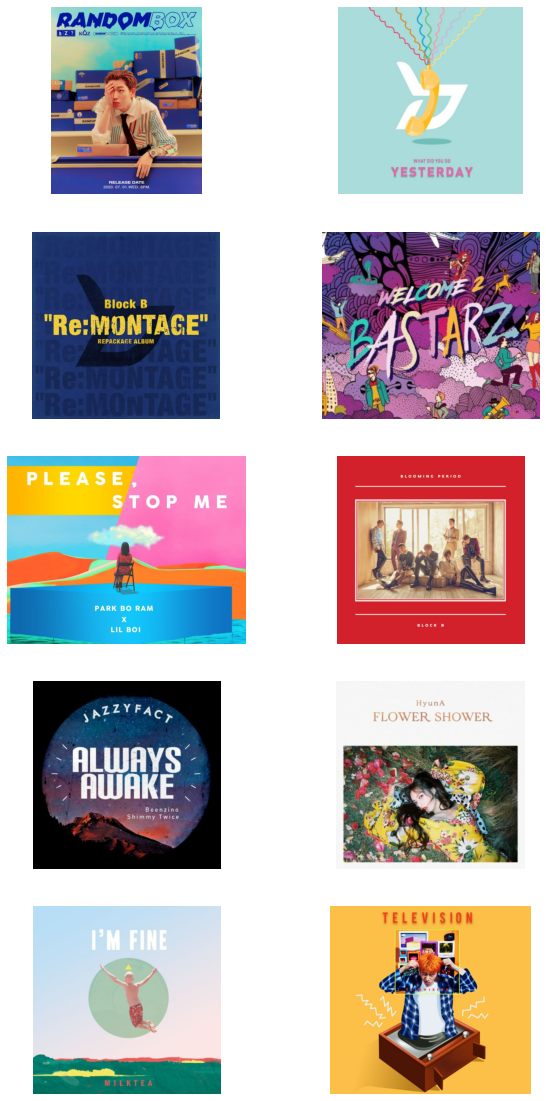

In [17]:
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.image as img

dir_path = os.getenv('HOME')+'/aiffel/ocr_python/project'
ext = '/*.JPG'
file_list = glob.glob(dir_path + ext)
file_list.sort()
print (file_list)

#앨범 표시 데이터셋 시각화
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10,20))

for i, ax in enumerate(axes.flatten()):
    image = img.imread(file_list[i])
    ax.imshow(image)
    ax.axis("off")
plt.show()

## 3. OCR Models 비교하기

### 3.1 Google OCR API

In [19]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

-rw-r--r-- 1 root root 2338 Sep 14 14:36 /aiffel/aiffel/ocr_python/my_google_api_key.json


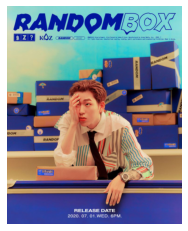

Texts:

"RANDOMBOX
Z ? KOZ
RANDOM
PAp e. erd utactured . .
L vd. rad cr l e perfu e ad. e ta r.
80
RANDOM
RANDOM
DOM
RANDON
RELEASE DATE
2020. 07. 01.WED. 6PM.
RANDOM
RAND
"

"RANDOMBOX"

"Z"

"?"

"KOZ"

"RANDOM"

"PAp"

"e."

"erd"

"utactured"

"."

"."

"L"

"vd."

"rad"

"cr"

"l"

"e"

"perfu"

"e"

"ad."

"e"

"ta"

"r."

"80"

"RANDOM"

"RANDOM"

"DOM"

"RANDON"

"RELEASE"

"DATE"

"2020."

"07."

"01.WED."

"6PM."

"RANDOM"

"RAND"
bounds: (735,452),(740,406),(751,407),(746,453)


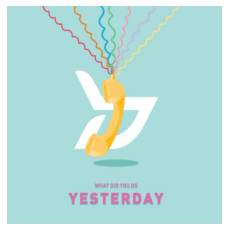

Texts:

"WHAT DID YOU DO
YESTERDAY
"

"WHAT"

"DID"

"YOU"

"DO"

"YESTERDAY"
bounds: (253,766),(641,766),(641,814),(253,814)


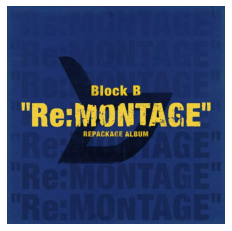

Texts:

"AGE
Re
Re:
"Re:MONTAGE"
AGE'
Block B
Re
"Re:MONTAGE"
"Re:MONTAGE"
REPACKAGE ALBUM
"

"AGE"

"Re"

"Re:"

""Re:MONTAGE""

"AGE'"

"Block"

"B"

"Re"

""Re:MONTAGE""

""Re:MONTAGE""

"REPACKAGE"

"ALBUM"
bounds: (686,728),(817,728),(817,757),(686,757)


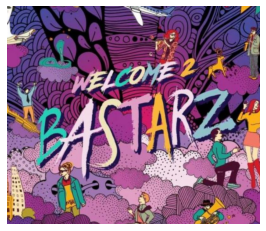

Texts:

"WELCOME 2
BASTARZ
"

"WELCOME"

"2"

"BASTARZ"
bounds: (50,331),(771,209),(812,456),(92,578)


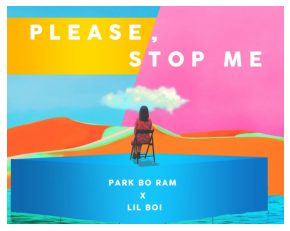

Texts:

"PLEASE,
STOP MЕ
PARK BO RAM
LIL BOI
"

"PLEASE,"

"STOP"

"MЕ"

"PARK"

"BO"

"RAM"

"LIL"

"BOI"
bounds: (678,969),(753,969),(753,997),(678,997)


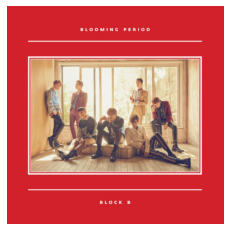

Texts:

"BLOOMING PERIOD
BLOCK B
"

"BLOOMING"

"PERIOD"

"BLOCK"

"B"
bounds: (484,781),(495,781),(495,792),(484,792)


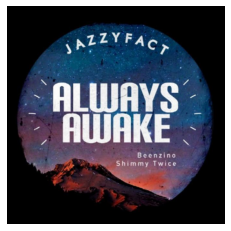

Texts:

"JAZZYFACT
ALWAYS
AWAKE
Beenzino
Shimmy Twice
"

"JAZZYFACT"

"ALWAYS"

"AWAKE"

"Beenzino"

"Shimmy"

"Twice"
bounds: (454,481),(524,481),(524,496),(454,496)


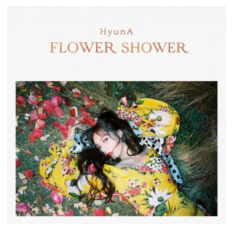

Texts:

"HyunA
FLOWER SHOWER
"

"HyunA"

"FLOWER"

"SHOWER"
bounds: (468,148),(739,148),(739,191),(468,191)


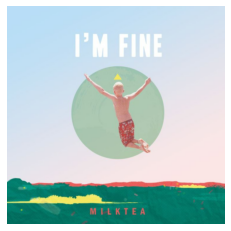

Texts:

"I'M FINE
MILKTEA
"

"I'M"

"FINE"

"MILKTEA"
bounds: (283,687),(469,687),(469,709),(283,709)


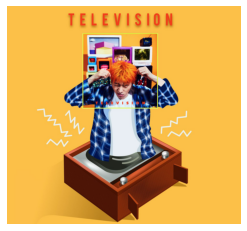

Texts:

"TELEVISION
TELEV ISIO
"

"TELEVISION"

"TELEV"

"ISIO"
bounds: (746,594),(829,594),(829,620),(746,620)


In [25]:
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

#위에서 정의한 OCR API 이용 함수 호출
for file in file_list :
    image = img.imread(file)
    plt.imshow(image)
    plt.axis("off")
    plt.show()    
    detect_text(file)

### 3.2 keras-OCR

In [26]:
import keras_ocr

#keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [27]:
images = [keras_ocr.tools.read(file) for file in file_list]
prediction_groups = [pipeline.recognize([file]) for file in file_list]

/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


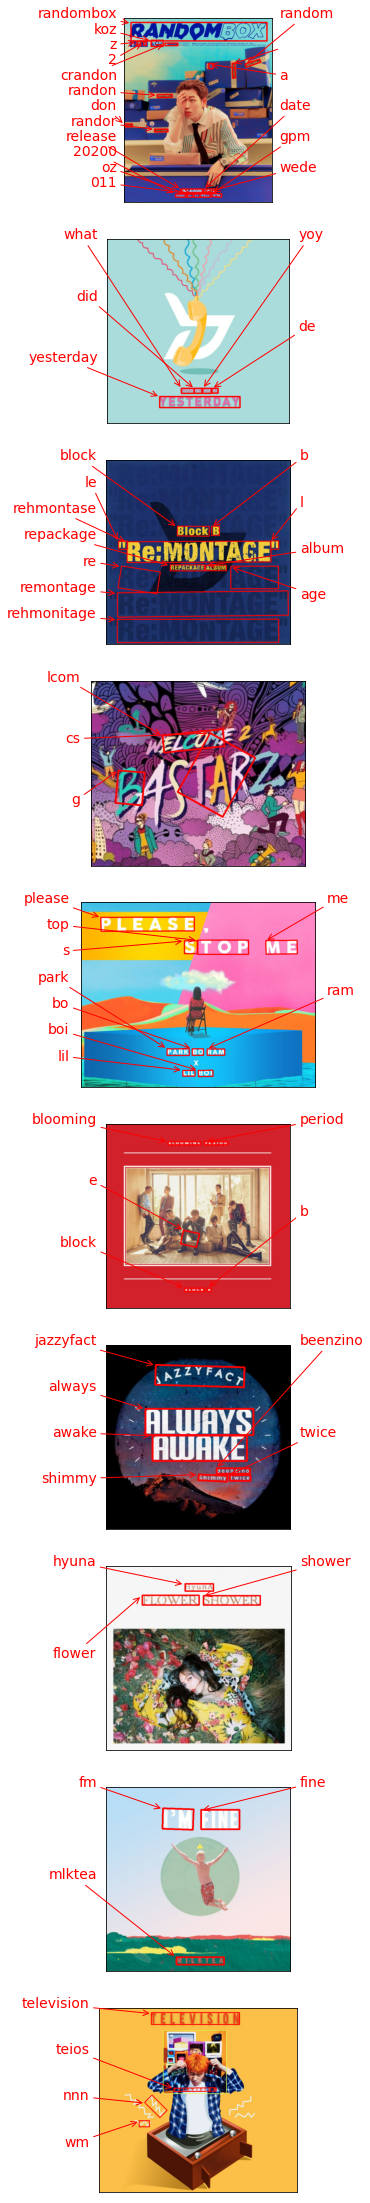

In [28]:
#인식된 결과 시각화
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 40))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

### 3.3 Tesseract
- 구글에서 후원하는 OCR 오픈소스 라이브러리.
- 테서랙트를 사용하면 한 번에 이미지 내의 문자 검출과 인식을 할 수 있음.

In [80]:
import pytesseract
from PIL import Image
from pytesseract import Output

def crop_word_and_recognize(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")

            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1

    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("------------- Done -------------")

In [76]:
file_name = []
for file in file_list :
    file_name.append(file[-11:])
    
print(file_name)

img_dir = os.getenv('HOME')+'/aiffel/ocr_python/project'

for names in file_name:
    print(os.path.join(img_dir, names))

['album01.JPG', 'album02.JPG', 'album03.JPG', 'album04.JPG', 'album05.JPG', 'album06.JPG', 'album07.JPG', 'album08.JPG', 'album09.JPG', 'album10.JPG']
/aiffel/aiffel/ocr_python/project/album01.JPG
/aiffel/aiffel/ocr_python/project/album02.JPG
/aiffel/aiffel/ocr_python/project/album03.JPG
/aiffel/aiffel/ocr_python/project/album04.JPG
/aiffel/aiffel/ocr_python/project/album05.JPG
/aiffel/aiffel/ocr_python/project/album06.JPG
/aiffel/aiffel/ocr_python/project/album07.JPG
/aiffel/aiffel/ocr_python/project/album08.JPG
/aiffel/aiffel/ocr_python/project/album09.JPG
/aiffel/aiffel/ocr_python/project/album10.JPG


[album01.JPG]


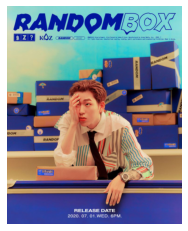

RANDOM :\cu.<

iBiZ\?

KOZ

' FPANDER Cl

noon

:


RELEASE

sy-¥E=

r10V408

ve

01 WED.

sladue

------------- Done -------------
[album02.JPG]


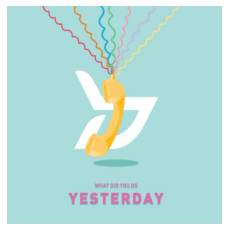

y


aie

vou

8

YESTERDAY

------------- Done -------------
[album03.JPG]


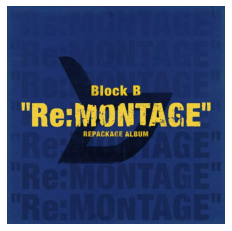

"Re: MONTAGE”

------------- Done -------------
[album04.JPG]


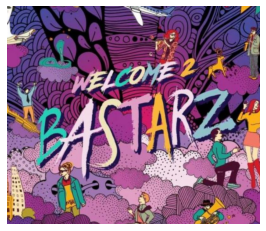

ve

------------- Done -------------
[album05.JPG]


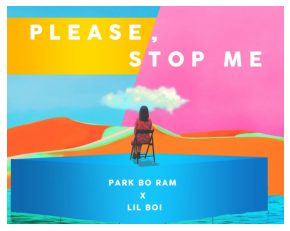

neal

------------- Done -------------
[album06.JPG]


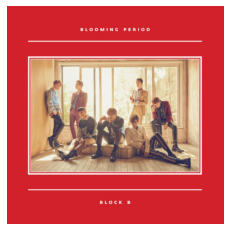

Cannot recognize characters from album06.JPG
[album07.JPG]


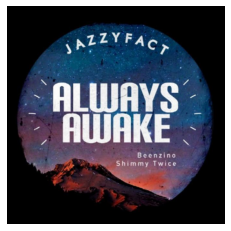

Nia

as

“cd Oe

~ ALWAYS”

e-

ye

KE -


------------- Done -------------
[album08.JPG]


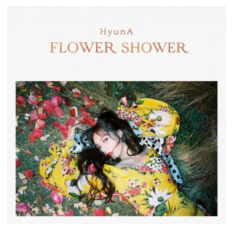

ea NX

------------- Done -------------
[album09.JPG]


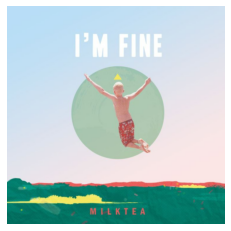

aa

------------- Done -------------
[album10.JPG]


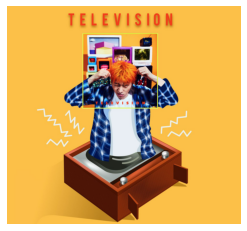

TELEVISION


------------- Done -------------


In [83]:
save_dir = os.getenv('HOME')+'/aiffel/ocr_python/project'

for names in file_name:
    print(f'[{names}]')
    
    try:
        image = img.imread(os.path.join(img_dir, names))
        plt.imshow(image)
        plt.axis("off")
        plt.show()
        crop_word_and_recognize(os.path.join(img_dir, names), save_dir)
    except:
        print(f'Cannot recognize characters from {names}')

## 4. 테스트 결과 정리
- 모델 평가 기준
  - 디자인이 되지 않은 텍스트 뿐 만 아니라 디자인이 된 텍스트까지 제대로 인식할 수 있는가.
  - 배경처럼 사용 된 텍스트들까지 인식할 수 있는가.
  - 크기가 아주 작은 텍스트들도 인식할 수 있는가.

In [104]:
#모델 별 결과 비교 함수
def check_results(file_name_list) :
    for name in file_name_list :
        print(f'[{name}]')
        image = img.imread(os.path.join(img_dir, name))
        plt.imshow(image)
        plt.axis("off")
        plt.show()
        print('\n[Google OCR]')
        detect_text(os.path.join(img_dir, name))
        print('\n[keras-OCR]')
        idx = file_list.index(os.path.join(img_dir, name))
        keras_ocr.tools.drawAnnotations(image=images[idx], predictions=prediction_groups[idx][0])
        plt.show()
        print('\n[Tesseract]')
        try:
            crop_word_and_recognize(os.path.join(img_dir, name), save_dir)
        except:
            print(f'Cannot recognize characters from {name}')    
        print('\n')

### 4.1 디자인이 된 텍스트가 포함된 앨범 표지

[album01.JPG]


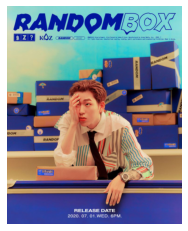


[Google OCR]
Texts:

"RANDOMBOX
Z ? KOZ
RANDOM
PAp e. erd utactured . .
L vd. rad cr l e perfu e ad. e ta r.
80
RANDOM
RANDOM
DOM
RANDON
RELEASE DATE
2020. 07. 01.WED. 6PM.
RANDOM
RAND
"

"RANDOMBOX"

"Z"

"?"

"KOZ"

"RANDOM"

"PAp"

"e."

"erd"

"utactured"

"."

"."

"L"

"vd."

"rad"

"cr"

"l"

"e"

"perfu"

"e"

"ad."

"e"

"ta"

"r."

"80"

"RANDOM"

"RANDOM"

"DOM"

"RANDON"

"RELEASE"

"DATE"

"2020."

"07."

"01.WED."

"6PM."

"RANDOM"

"RAND"
bounds: (735,452),(740,406),(751,407),(746,453)

[keras-OCR]


/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


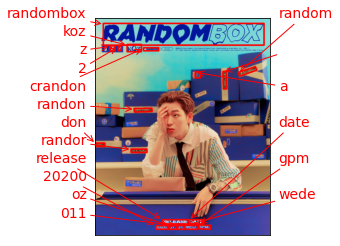


[Tesseract]
RANDOM :\cu.<

iBiZ\?

KOZ

' FPANDER Cl

noon

:


RELEASE

sy-¥E=

r10V408

ve

01 WED.

sladue

------------- Done -------------


[album03.JPG]


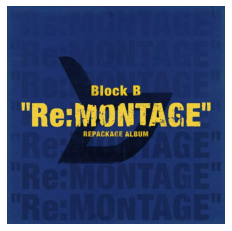


[Google OCR]
Texts:

"AGE
Re
Re:
"Re:MONTAGE"
AGE'
Block B
Re
"Re:MONTAGE"
"Re:MONTAGE"
REPACKAGE ALBUM
"

"AGE"

"Re"

"Re:"

""Re:MONTAGE""

"AGE'"

"Block"

"B"

"Re"

""Re:MONTAGE""

""Re:MONTAGE""

"REPACKAGE"

"ALBUM"
bounds: (686,728),(817,728),(817,757),(686,757)

[keras-OCR]


/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


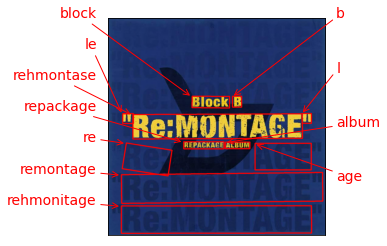


[Tesseract]
"Re: MONTAGE”

------------- Done -------------


[album04.JPG]


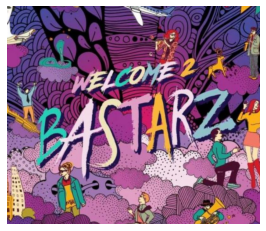


[Google OCR]
Texts:

"WELCOME 2
BASTARZ
"

"WELCOME"

"2"

"BASTARZ"
bounds: (50,331),(771,209),(812,456),(92,578)

[keras-OCR]


/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


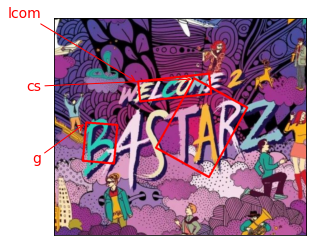


[Tesseract]
ve

------------- Done -------------


[album07.JPG]


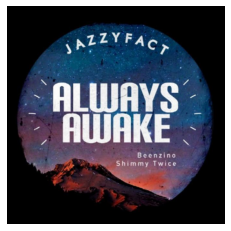


[Google OCR]
Texts:

"JAZZYFACT
ALWAYS
AWAKE
Beenzino
Shimmy Twice
"

"JAZZYFACT"

"ALWAYS"

"AWAKE"

"Beenzino"

"Shimmy"

"Twice"
bounds: (454,481),(524,481),(524,496),(454,496)

[keras-OCR]


/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


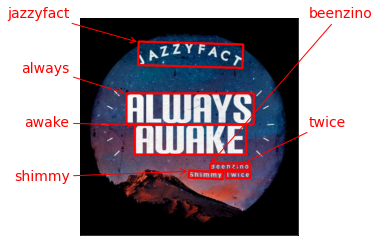


[Tesseract]
Nia

as

“cd Oe

~ ALWAYS”

e-

ye

KE -


------------- Done -------------




In [101]:
#디자인이 된 텍스트가 포함된 앨범 표지는 총 4개임.
file_name1 = ['album01.JPG', 'album03.JPG', 'album04.JPG', 'album07.JPG']

check_results(file_name1)

#### 4.1.1 디자인이 된 텍스트 결과 비교
- Google OCR :디자인이 된 텍스트 중 형태가 일그러지지 않은 텍스트들에 대해서 recognition 결과가 좋은 편이다. 형태가 아예 달라진 경우에는 제대로 인식을 하지 못했다.
- keras-OCR : 디자인이 된 텍스트임에도 크기가 큰 경우에는 detection도 정상적으로 진행되며 recognition 결과도 좋다. 하지만 회전이 된 경우에는 detection도 recognition도 제대로 진행이 되지 않는다.  
- Tesseract : 테서랙트의 경우 모든 케이스에서 제대로 recognition이 되지 않았다.

### 4.2 디자인이 되지 않은 깔끔한 텍스트가 포함된 앨범 표지

[album02.JPG]


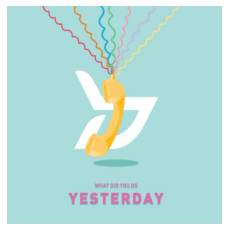


[Google OCR]
Texts:

"WHAT DID YOU DO
YESTERDAY
"

"WHAT"

"DID"

"YOU"

"DO"

"YESTERDAY"
bounds: (253,766),(641,766),(641,814),(253,814)

[keras-OCR]


/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


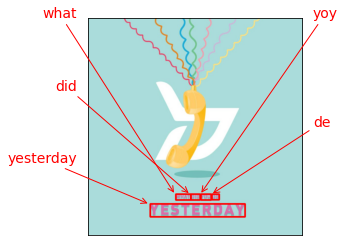


[Tesseract]
y


aie

vou

8

YESTERDAY

------------- Done -------------


[album05.JPG]


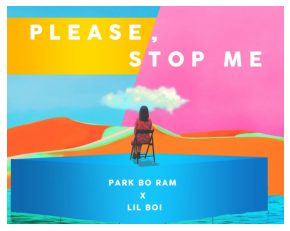


[Google OCR]
Texts:

"PLEASE,
STOP MЕ
PARK BO RAM
LIL BOI
"

"PLEASE,"

"STOP"

"MЕ"

"PARK"

"BO"

"RAM"

"LIL"

"BOI"
bounds: (678,969),(753,969),(753,997),(678,997)

[keras-OCR]


/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


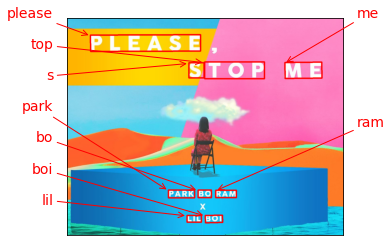


[Tesseract]
neal

------------- Done -------------


[album08.JPG]


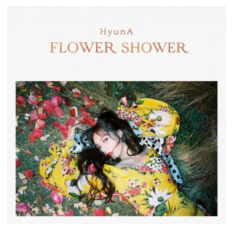


[Google OCR]
Texts:

"HyunA
FLOWER SHOWER
"

"HyunA"

"FLOWER"

"SHOWER"
bounds: (468,148),(739,148),(739,191),(468,191)

[keras-OCR]


/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


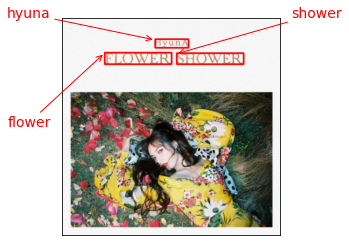


[Tesseract]
ea NX

------------- Done -------------


[album09.JPG]


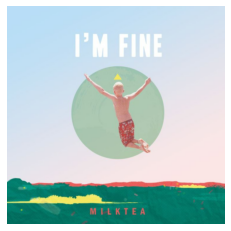


[Google OCR]
Texts:

"I'M FINE
MILKTEA
"

"I'M"

"FINE"

"MILKTEA"
bounds: (283,687),(469,687),(469,709),(283,709)

[keras-OCR]


/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


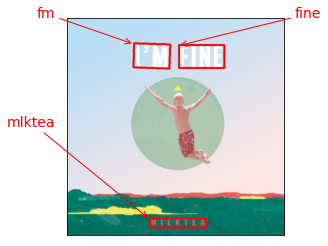


[Tesseract]
aa

------------- Done -------------


[album10.JPG]


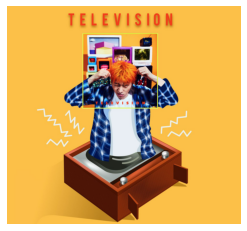


[Google OCR]
Texts:

"TELEVISION
TELEV ISIO
"

"TELEVISION"

"TELEV"

"ISIO"
bounds: (746,594),(829,594),(829,620),(746,620)

[keras-OCR]


/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


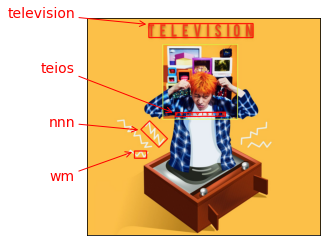


[Tesseract]
TELEVISION


------------- Done -------------




In [102]:
#디자인이 되지 않은 깔끔한 텍스트의 앨범 표지는 총 5개임.
file_name2 = ['album02.JPG', 'album05.JPG', 'album08.JPG', 'album09.JPG', 'album10.JPG']

check_results(file_name2)

#### 4.2.1 깔끔한 폰트의 텍스트 결과 비교
- Google OCR :깔끔한 폰트여서 그런지 모든 케이스에 대해 깔끔하고 정확하게 recognition이 되었다.
- keras-OCR : 대부분의 케이스에 대해 깔끔하게 detection이 되었고 recognition도 거의 정확하게 진행되었다. 하지만 축약어에 대해서는 recogition이 정확하게 되지 않았으며 텍스트가 아닌 부분을 텍스트라고 detection하기도 했다.
- Tesseract : 테서랙트의 경우 모든 케이스에서 제대로 recognition이 되지 않았다.

### 4.3 크기가 작은 텍스트가 포함된 앨범 표지

[album06.JPG]


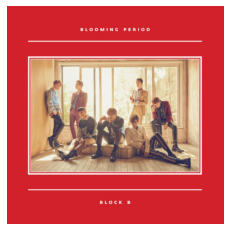


[Google OCR]
Texts:

"BLOOMING PERIOD
BLOCK B
"

"BLOOMING"

"PERIOD"

"BLOCK"

"B"
bounds: (484,781),(495,781),(495,792),(484,792)

[keras-OCR]


/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


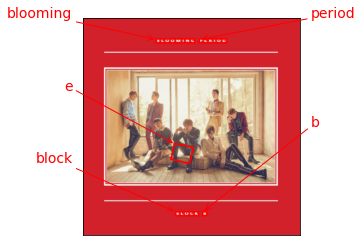


[Tesseract]
Cannot recognize characters from album06.JPG




In [106]:
#크기가 작은 텍스트를 가진 앨범 표지는 1개임.
file_name3 = ['album06.JPG']

check_results(file_name3)

#### 4.3.1 크기가 작은 텍스트 결과 비교
- Google OCR :깔끔한 폰트여서 그런지 크기가 아주 작음에도 제대로 recognition이 되었다.
- keras-OCR : 크기가 작지만 모든 텍스트에 대해서 detection과 정확한 recognition이 진행되었지만 텍스트가 아닌 부분도 텍스트로 detection되기도 했다.
- Tesseract : 크기가 너무 작아서 그런지 테서랙트는 아예 인식하지 못했다.

### 4.4 배경처럼 텍스트가 사용된 앨범 표지

[album03.JPG]


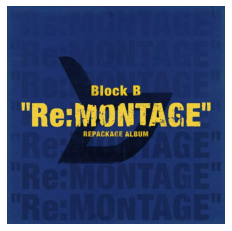


[Google OCR]
Texts:

"AGE
Re
Re:
"Re:MONTAGE"
AGE'
Block B
Re
"Re:MONTAGE"
"Re:MONTAGE"
REPACKAGE ALBUM
"

"AGE"

"Re"

"Re:"

""Re:MONTAGE""

"AGE'"

"Block"

"B"

"Re"

""Re:MONTAGE""

""Re:MONTAGE""

"REPACKAGE"

"ALBUM"
bounds: (686,728),(817,728),(817,757),(686,757)

[keras-OCR]


/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


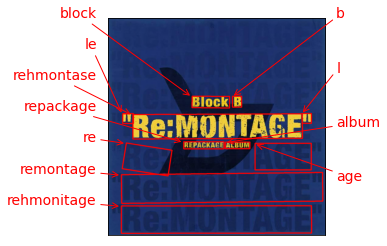


[Tesseract]
"Re: MONTAGE”

------------- Done -------------




In [107]:
#텍스트가 배경처럼 사용된 앨범 표지는 1개임.
file_name4 = ['album03.JPG']

check_results(file_name4)

#### 4.4.1 텍스트가 배경처럼 사용된 경우 결과 비교
- Google OCR : 주가되는 텍스트 뒤에 배경처럼 깔린 텍스트들은 제대로 인식이 되지 않았지만 주가 되는 텍스트는 정확하게 인식이 되었다.
- keras-OCR : 주가 되지 않는 뒷 배경의 텍스트 전부가 인식이 되지 않고 일부만 detection이 진행되었다. 진행된 detection에 대해서도 recognition이 정확하게 진행되지 않았다.
- Tesseract : 주가되는 텍스트만 제대로 인식하였으며 뒷 배경의 텍스트는 하나도 인식이 되지 않았다.

---

## - 프로젝트 정리


- ⭕ : 인식이 아주 정확하게 됨.
- 🔺 : detection은 제대로 진행이 되지만 recognition은 제대로 진행이 되지 않음. 혹은 일부만 detection이나 recognition이 진행 됨.
- ❌ : detection, recognition 모두 제대로 진행이 되지 않음.
    
| 모델 평가 기준 | Google OCR | keras-OCR | Tesseract |   
| :--: | :--: | :--: | :--: |      
| 디자인이 된 텍스트 | ⭕ | 🔺 | ❌ |   
| 디자인이 되지 않은 깔끔한 폰트의 텍스트 | ⭕ | ⭕ | 🔺 |   
| 크기가 아주 작은 텍스트 | ⭕ | ⭕ | ❌ |   
| 배경처럼 사용된 텍스트 | 🔺 | 🔺 | ❌ |   


- 위의 결과를 바탕으로 앨범 표지의 앨범명, 아티스트 명 등의 정보를 파악하는 서비스에 가장 적합한 모델은 'Google OCR'인 것을 알 수 있다.
- Tesseract는 모든 경우에 대해서 제대로 된 결과물을 얻을 수 없었다.